In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Exploratory data analysis

In [9]:
import os
while 'notebooks' in os.getcwd():
    os.chdir("..")

import numpy as np
import pandas as pd 
from src.path_reader import BASE_PATH_TRAIN
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
os.listdir(BASE_PATH_TRAIN)

['ArgentinaBelgium72.csv',
 'ArgentinaGermanyFinal77.csv',
 'AustraliaNetherlands29.csv',
 'AustraliaSpain34.csv',
 'BelgiumSouthKorea59.csv',
 'CameroonBrazil36.csv',
 'FranceGermany70.csv',
 'FranceNigeria66.csv',
 'GermanyAlgeria67.csv',
 'GermanyBrazil74.csv',
 'GermanyUSA57.csv',
 'HondurasSwitzerland54.csv',
 'MexicoCroatia37.csv',
 'NetherlandsChile35.csv',
 'PortugalGhana58.csv',
 'USASlovenia2010.csv']

In [11]:
len(os.listdir(BASE_PATH_TRAIN))

16

In [12]:
all_dfs = []
for file in tqdm(os.listdir(BASE_PATH_TRAIN)):
    file_path = os.path.join(BASE_PATH_TRAIN, file)
    all_dfs.append(pd.read_csv(file_path))

100%|██████████| 16/16 [00:05<00:00,  3.09it/s]


In [13]:
train_df = pd.concat(all_dfs)
train_df

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
0,11_0,11,0,0,1404575400000,RT @2014WorIdCup: Argentina vs Belgium\n\nWho ...
1,11_0,11,0,0,1404575400000,@elijahman_ time to focus on Belgium winning t...
2,11_0,11,0,0,1404575400000,RT @FIFAWorldCup: GLOBAL STADIUM: #Joinin with...
3,11_0,11,0,0,1404575400000,RT @CatholicNewsSvc: #PopeFrancis. Uh-oh. Arge...
4,11_0,11,0,0,1404575400000,RT @soccerdotcom: If he scores vs #BEL we'll a...
...,...,...,...,...,...,...
85670,18_129,18,129,0,1276876799000,RT @nytimes FIFA World Cup -- Final Score: U.S...
85671,18_129,18,129,0,1276876799000,Ugh!!! should've been 3-2 USA! #worldcup
85672,18_129,18,129,0,1276876799000,RT @jaclynkeough: Ha! RT @someecards I'd rathe...
85673,18_129,18,129,0,1276876799000,RT @gustavaulia: So many surprises at worldcup...


In [ ]:
train_df.query("EventType == 1").Tweet

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
10873,11_5,11,5,1,1404575701000,RT @SportsCenter: One semifinal is set. Who's ...
10874,11_5,11,5,1,1404575701000,RT @worldsoccershop: Win a signed #Messi Jerse...
10875,11_5,11,5,1,1404575701000,Go Argentina... This is your time...
10876,11_5,11,5,1,1404575701000,Argentina Vs. Belguim #QuarterFinals #WorldCup...
10877,11_5,11,5,1,1404575701000,RT @Total_Futbol_: The atmosphere at the World...
...,...,...,...,...,...,...
84797,18_128,18,128,1,1276876740000,RT @HotelEdge: Guaranteed 100% Vuvuzela Free. ...
84798,18_128,18,128,1,1276876740000,RT @tweetbeat: The game ends #USA 2 - 2 #SVN. ...
84799,18_128,18,128,1,1276876740000,Mr. James Joyce probably officiated his WorldC...
84800,18_128,18,128,1,1276876740000,RT @tw1tt3rart: #USA #WORLDCUP â€ƒâ€ƒâ€ƒ âœ­â•...


In [7]:
train_df['MatchID'].value_counts()

MatchID
1     973985
10    824241
4     712525
5     525725
13    367899
11    313803
3     272389
17    256445
19    155549
8     148298
14     99192
12     96834
7      95108
2      86843
18     85675
0      41539
Name: count, dtype: int64

In [6]:
train_df.query("MatchID == 4")

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
0,4_0,4,0,0,1404157800000,RT @FOXSoccer: 2006 World Cup: 147 goals TOTAL...
1,4_0,4,0,0,1404157800000,RT @TransferSources: GIVEAWAY: If Ozil scores ...
2,4_0,4,0,0,1404157800000,"I don mind riding alone ""@Not_anIdiot: Haha le..."
3,4_0,4,0,0,1404157800000,RT @dw_sports: No current @bvb players in the ...
4,4_0,4,0,0,1404157800000,RT @trueSCRlife: If Müller scores for #GER we'...
...,...,...,...,...,...,...
712520,4_169,4,169,0,1404168000000,RT @FOXSoccer: 3/4 of the #WorldCup quarterfin...
712521,4_169,4,169,0,1404168000000,RT @Rodolph_hilal: Plz guys RETWEET .. \n\nLet...
712522,4_169,4,169,0,1404168000000,RT @Joey7Barton: Algeria can take a lot of pos...
712523,4_169,4,169,0,1404168000000,"RT @caughtoffside: #ALG gave it their all, was..."


#### Number of tweets in each match

In [7]:
train_df['MatchID'].unique()

array([11, 10, 12,  2, 14,  8,  5, 13,  4,  1, 17,  0, 19,  7,  3, 18])

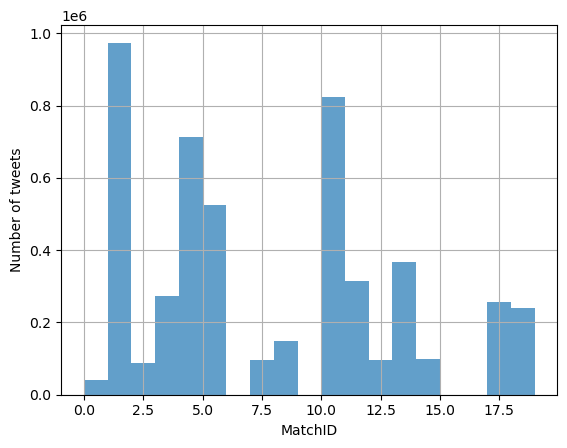

In [8]:
plt.hist(train_df['MatchID'], alpha = 0.7, bins=19)
plt.xlabel("MatchID")
plt.ylabel("Number of tweets")
plt.grid()

#### Missing values

In [9]:
train_df.isna().sum()

ID           0
MatchID      0
PeriodID     0
EventType    0
Timestamp    0
Tweet        0
dtype: int64

#### Removing retweets and duplicates

In [19]:
len(train_df)

5056050

In [20]:
train_df.duplicated("Tweet").sum()/len(train_df)

0.4422545267550756

Almost 50% of the dataset is made of duplicates

In [23]:
train_df = train_df.drop_duplicates("Tweet")

In [27]:
train_df['Tweet'].str.contains("RT").sum()/len(train_df)

0.19578693392066424

Almost 20% of the remaining dataset is made of retweets

In [36]:
rt_mask = train_df['Tweet']\
    .str\
    .lower()\
    .str\
    .contains("rt")

In [37]:
train_df = train_df[~rt_mask]

In [39]:
train_df

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
1,11_0,11,0,0,1404575400000,@elijahman_ time to focus on Belgium winning t...
6,11_0,11,0,0,1404575400000,I just hope Argentina lose. Would be fun to se...
7,11_0,11,0,0,1404575400000,Watch Argentina vs Belgium 5th July 2014 LIVE ...
8,11_0,11,0,0,1404575400000,@JRMun0z why dont you like Argentina.
9,11_0,11,0,0,1404575400000,"Even though I hate Belgium for beating the US,..."
...,...,...,...,...,...,...
85664,18_129,18,129,0,1276876799000,"OK, so England has to tie and not score more t..."
85666,18_129,18,129,0,1276876799000,But that was a real soccer match after so many...
85667,18_129,18,129,0,1276876799000,@heykolls no! #usa #worldcup :)
85669,18_129,18,129,0,1276876799000,WOAH. That was an awesome game of soccer just ...


#### Average length of tweets

In [40]:
def get_text_len(x: pd.Series):
    return x.apply(lambda u : len(u.split(" "))).mean()



In [41]:
train_df.groupby("MatchID")\
    .Tweet\
    .apply(get_text_len)

MatchID
0     13.070242
1     11.489751
2     13.780701
3     11.189897
4     11.337971
5     11.341387
7     11.157503
8     11.631113
10    10.847529
11    11.464208
12    12.308974
13    11.560793
14    12.591495
17    12.967986
18    13.034805
19    10.626560
Name: Tweet, dtype: float64

#### Analysing column PeriodID

<Axes: xlabel='PeriodID', ylabel='Count'>

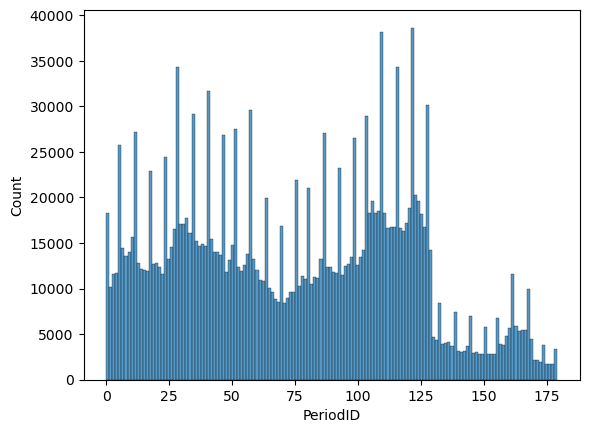

In [42]:
sns.histplot(train_df['PeriodID'])

#### Distribution of Targets

Text(0.5, 1.0, '% Of positive targets in the dataset')

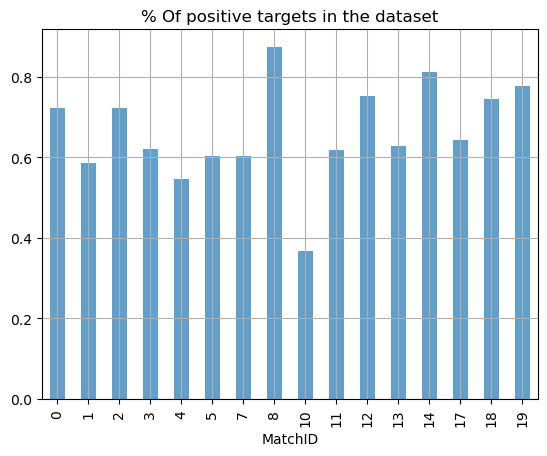

In [43]:
train_df.groupby("MatchID")\
    ['EventType']\
    .mean()\
    .plot.bar(
        alpha = 0.7,
    )

plt.grid()
plt.title("% Of positive targets in the dataset")

In [44]:
np.random.seed(1)
train_idx = sorted(np.random.choice(train_df['MatchID'].unique(), 10, replace=False))

In [45]:
list(train_idx)

[2, 3, 5, 7, 10, 11, 12, 13, 14, 17]

In [46]:
train_idx = set(train_idx)
test_idx = set(train_df['MatchID'].unique()) - train_idx

list(test_idx)

[0, 1, 4, 8, 18, 19]

#### Checking if tweets that happened in the same minute had always the same label

In [61]:
train_df.groupby(["MatchID", "PeriodID"], )\
    .EventType\
    .mean()\
    .isin([0,1])\
    .all()

True

#### Word Clouds

In [62]:
texts = train_df.query("EventType == 1")\
    .sample(1000)\
    .Tweet\
    .tolist()

texts = " ".join(texts)

In [63]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)


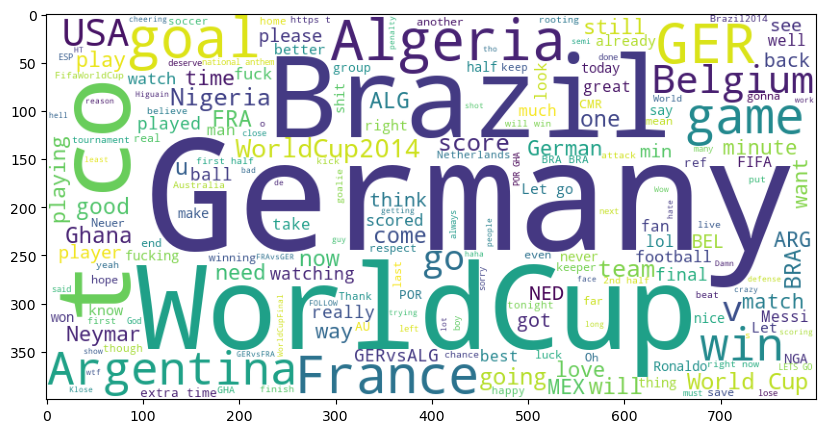

In [64]:
plt.figure(figsize=(16,5))
plt.imshow(wordcloud,)

In [65]:
texts = train_df.query("EventType == 0")\
    .sample(1000)\
    .Tweet\
    .tolist()

texts = " ".join(texts)

In [66]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)


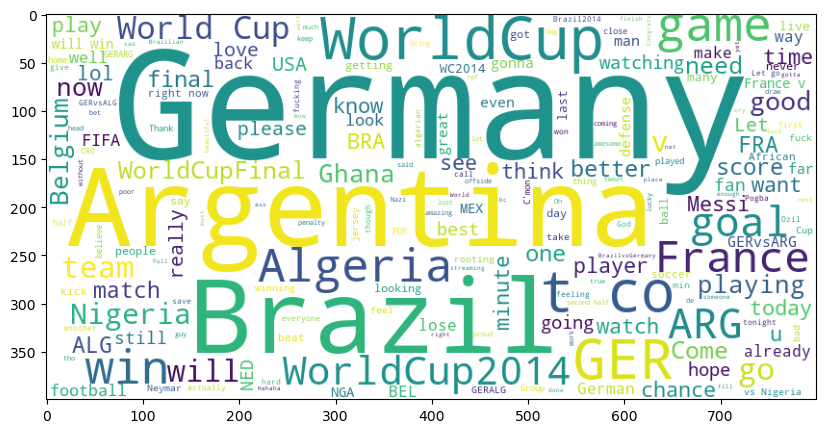

In [67]:
plt.figure(figsize=(16,5))
plt.imshow(wordcloud,)